# Wildlife Data Analysis

This notebook contains a comprehensive analysis of wildlife data, exploring various aspects of animal species, their characteristics, and conservation status.

## Data Loading and Preprocessing
First, let's import the necessary libraries and load our dataset.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ast import literal_eval

In [21]:
# Read the dataset
df = pd.read_csv('animals_info.csv')

# Display basic information about the dataset
print("=== Dataset Overview ===")
print(f"Number of animals: {len(df)}")
print(f"\nColumns in the dataset:")
for col in df.columns:
    print(f"- {col}")

# Display first few rows
print("\n=== First Few Rows ===")
df.head(30)

=== Dataset Overview ===
Number of animals: 29357

Columns in the dataset:
- Name
- Kingdom
- Phylum
- Subphylum
- Class
- Order
- Suborder
- Family
- Genus
- Species
- Population size
- Life span
- Top speed
- Weight
- Height
- Length
- Attributes
- Distribution
- Habits
- Diet
- Mating_Habits
- Population

=== First Few Rows ===


,Name,Kingdom,Phylum,Subphylum,Class,Order,Suborder,Family,Genus,Species,...,Top speed,Weight,Height,Length,Attributes,Distribution,Habits,Diet,Mating_Habits,Population
0,Grey Wolf,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Caniformia,Canidae,Canis,Canis lupus,...,75 km/h,16-60 kg,80-85 cm,105-160 cm,"Nocturnal,Carnivore,Scavenger,Terrestrial,Curs...","{'Geography': {'Continents': 'Asia, Europe, No...","{'Group name': 'pack, route, rout', 'Lifestyle...","Carnivore,,Scavenger","{'Mating behavior': 'Monogamy', 'Reproduction ...","{'Population trend': 'Stable', 'Population sta..."
1,Tiger,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Feliformia,Felidae,Panthera,Panthera tigris,...,96 km/h,65-306 kg,NaN,200-390 cm,"Nocturnal,Carnivore,Cursorial,Terrestrial,Ambu...","{'Geography': {'Continents': 'Asia', 'Subconti...","{'Lifestyle': 'Cursorial, Terrestrial, Ambush ...",Carnivore,"{'Mating behavior': 'Polygyny', 'Reproduction ...","{'Population trend': 'Decreasing', 'Population..."
2,Brown Bear,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Caniformia,Ursidae,Ursus,Ursus arctos,...,56 km/h,100-635 kg,70-153 cm,1.4-2.8 m,"Crepuscular,Omnivore,Terrestrial,Altricial,Nom...","{'Geography': {'Continents': 'Asia, Europe, No...","{'Group name': 'sloth, sleuth', 'Lifestyle': '...",Omnivore,"{'Mating behavior': 'Polygynandry,', 'Reproduc...","{'Population trend': 'Stable', 'Population sta..."
3,Blue Whale,Animalia,Chordata,Vertebrata,Mammalia,Artiodactyla,NaN,Balaenopteridae,Balaenoptera,Balaenoptera musculus,...,20 km/h,100-160 t,NaN,25-30 m,"Carnivore,Piscivores,Aquatic,Precocial,Natator...","{'Geography': {'Continents': 'Africa, South Am...","{'Group name': 'pod, gam, herd, school, mod', ...","Carnivore,,Piscivores","{'Mating behavior': 'Monogamy', 'Reproduction ...","{'Population trend': 'Increasing', 'Population..."
4,Killer Whale,Animalia,Chordata,Vertebrata,Mammalia,Artiodactyla,NaN,Delphinidae,Orcinus,Orcinus orca,...,45 km/h,3-6 t,NaN,6-9 m,"Diurnal,Carnivore,Aquatic,Precocial,Cosmopolit...","{'Geography': {'Continents': 'Africa, Oceania,...","{'Group name': 'pod, gam, herd, school, mod', ...",Carnivore,"{'Mating behavior': 'Polygynandry', 'Reproduct...",{'Population status': 'Data deficient (DD)'}
5,Giant Panda,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Caniformia,Ursidae,Ailuropoda,Ailuropoda melanoleuca,...,32 km/h,70-160 kg,60-90 cm,1.2-1.9 m,"Crepuscular,Nocturnal,Herbivore,Folivore,Terre...","{'Geography': {'Continents': 'Asia', 'Subconti...","{'Group name': 'sleuth', 'Lifestyle': 'Terrest...","Herbivore,,Folivore","{'Mating behavior': 'Polygyny', 'Reproduction ...","{'Population trend': 'Increasing', 'Population..."
6,Lion,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Feliformia,Felidae,Panthera,Panthera leo,...,56 km/h,120-249 kg,NaN,140-250 cm,"Nocturnal,Crepuscular,Diurnal,Scavenger,Hyperc...","{'Geography': {'Continents': 'Africa, Asia', '...","{'Group name': 'pride, sault, troop, sawt', 'L...","Scavenger,,Hypercarnivore","{'Mating behavior': 'Polygyny', 'Reproduction ...","{'Population trend': 'Decreasing', 'Population..."
7,Koala,Animalia,Chordata,Vertebrata,Mammalia,Diprotodontia,NaN,Phascolarctidae,Phascolarctos,Phascolarctos cinereus,...,10 km/h,4-15 kg,60-85 cm,NaN,"Nocturnal,Herbivore,Folivore,Arboreal,Altricia...","{'Geography': {'Continents': 'Oceania', 'Count...","{'Lifestyle': 'Arboreal, Altricial, Terrestria...","Herbivore,,Folivore","{'Mating behavior': 'Polygyny', 'Reproduction ...","{'Population trend': 'Decreasing', 'Population..."
8,Cougar,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Feliformia,Felidae,Puma,Puma concolor,...,45 km/h,29-100 kg,60-90 cm,2-2.4 m,"Nocturnal,Carnivore,Terrestrial,Altricial,Ambu...","{'Geography': {'Continents': 'South America, N...","{'Lifestyle': 'Terrestrial, Altricial, Ambush ...","Carnivore,","{'Mating behavior': 'Polygyny', 'Reproduction ...","{'Population trend': 'Decreasing', 'Population..."
9,Quokka,Animalia,Chordata,Vertebrata,Mammalia,Diprotodontia,N

## Data Cleaning and Preprocessing

Let's clean our data and prepare it for analysis:
1. Handle missing values
2. Clean numerical columns (Population size, Life span, Top speed, Weight)
3. Extract meaningful information from complex columns (Distribution, Habits)

In [22]:
def clean_numeric_value(value):
    """Clean numeric values that might contain ranges (e.g., '10-20 yrs')"""
    if pd.isna(value):
        return np.nan
    if isinstance(value, str):
        # Extract numbers from string
        numbers = pd.to_numeric(value.replace(',', '').split('-')[0], errors='coerce')
        return numbers
    return value

# Clean population size
df['Population_size_clean'] = df['Population size'].apply(clean_numeric_value)

# Clean life span (extract first number from ranges like '10-20 yrs')
df['Life_span_years'] = df['Life span'].str.extract(r'(\d+)').astype(float)  # Added 'r' prefix

# Clean top speed
df['Speed_kmh'] = df['Top speed'].str.extract(r'(\d+)').astype(float)  # Added 'r' prefix

# Display summary of cleaned numerical columns
print("=== Summary Statistics ===")
numerical_cols = ['Population_size_clean', 'Life_span_years', 'Speed_kmh']
print(df[numerical_cols].describe())

# Display number of missing values
print("\n=== Missing Values ===")
print(df[numerical_cols].isnull().sum())

=== Summary Statistics ===
       Population_size_clean  Life_span_years   Speed_kmh
count           6.430000e+02      1837.000000  591.000000
mean            6.955316e+05        15.571040   51.414552
std             8.926977e+06        14.101406   56.343881
min             4.500000e-01         1.000000    0.000000
25%             4.800000e+01         7.000000   26.500000
50%             1.500000e+03        12.000000   45.000000
75%             7.000000e+04        20.000000   64.000000
max             2.100000e+08       150.000000  790.000000

=== Missing Values ===
Population_size_clean    28714
Life_span_years          27520
Speed_kmh                28766
dtype: int64


C:\Users\eduar\AppData\Local\Temp\ipykernel_27132\3335987220.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_counts.values[:10], y=class_counts.index[:10], palette="viridis")


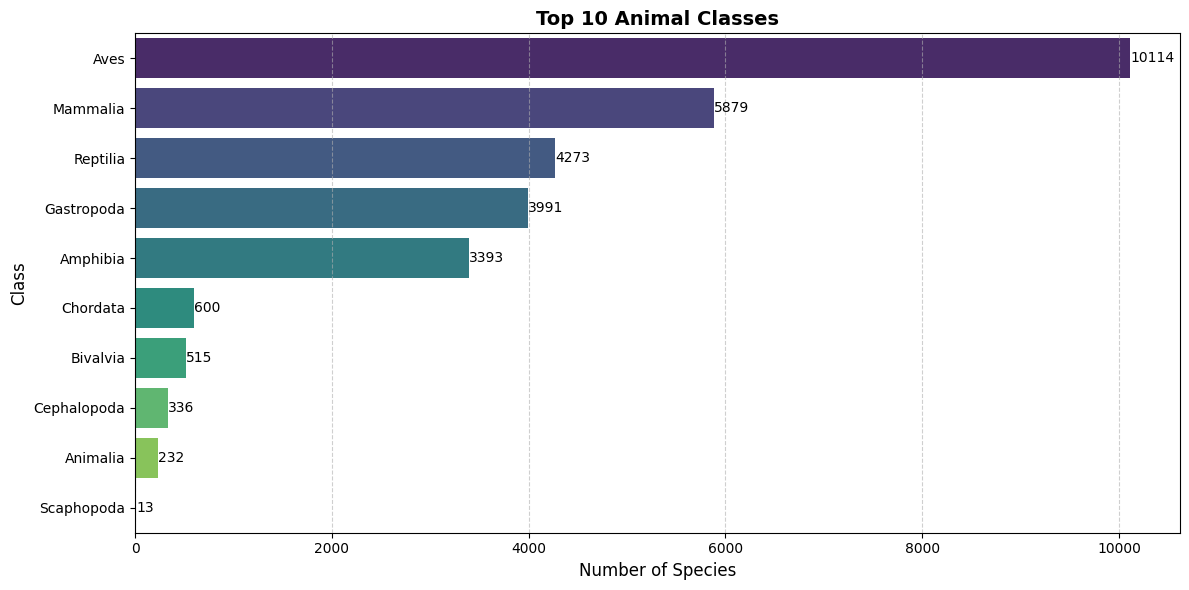

In [51]:
plt.figure(figsize=(12, 6))

# Get class counts
class_counts = df['Class'].value_counts()

# Create a barplot with color palette
ax = sns.barplot(x=class_counts.values[:10], y=class_counts.index[:10], palette="viridis")

# Add labels to the bars
for i, v in enumerate(class_counts.values[:10]):
    ax.text(v + 0.05, i, str(v), color='black', ha='left', va='center', fontsize=10)

# Customize the chart
plt.title('Top 10 Animal Classes', fontsize=14, fontweight='bold')
plt.xlabel('Number of Species', fontsize=12)
plt.ylabel('Class', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Light grid for better readability
plt.tight_layout()

plt.show()

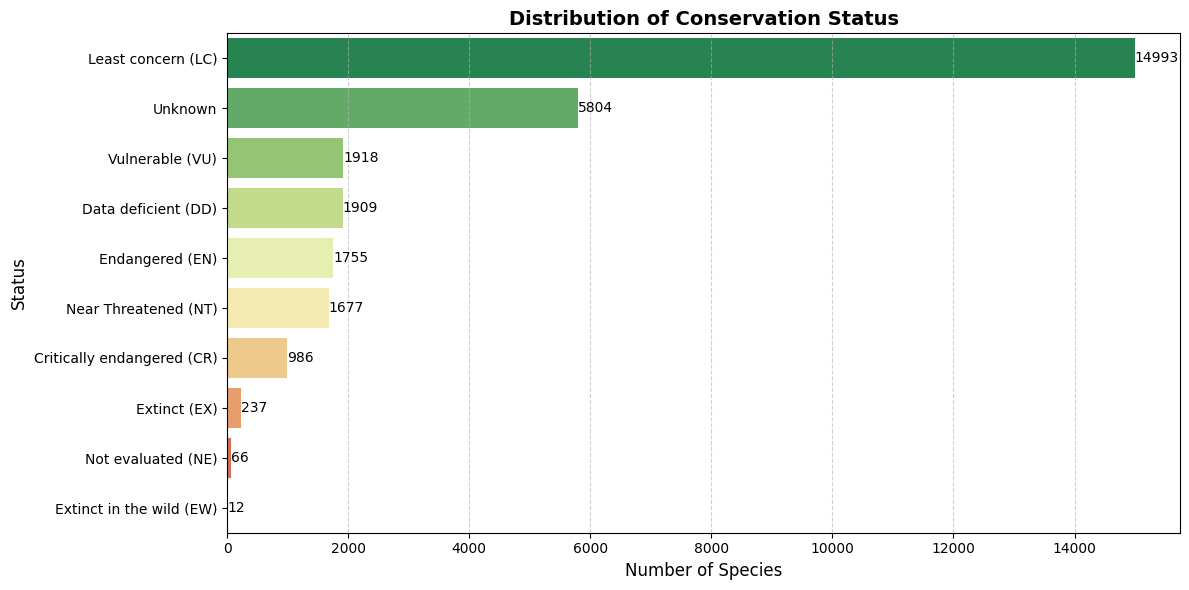

In [58]:
plt.figure(figsize=(12, 6))
status_counts = df['Conservation_Status'].value_counts()

# Create the barplot
ax = sns.barplot(x=status_counts.values, y=status_counts.index, hue=status_counts.index, palette='RdYlGn_r', legend=False)

# Add labels to the bars
for i, v in enumerate(status_counts.values):
    ax.text(v + 0.05, i, str(v), color='black', ha='left', va='center', fontsize=10)

# Customize the chart
plt.title('Distribution of Conservation Status', fontsize=14, fontweight='bold')
plt.xlabel('Number of Species', fontsize=12)
plt.ylabel('Status', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Light grid for better readability
plt.tight_layout()

plt.show()

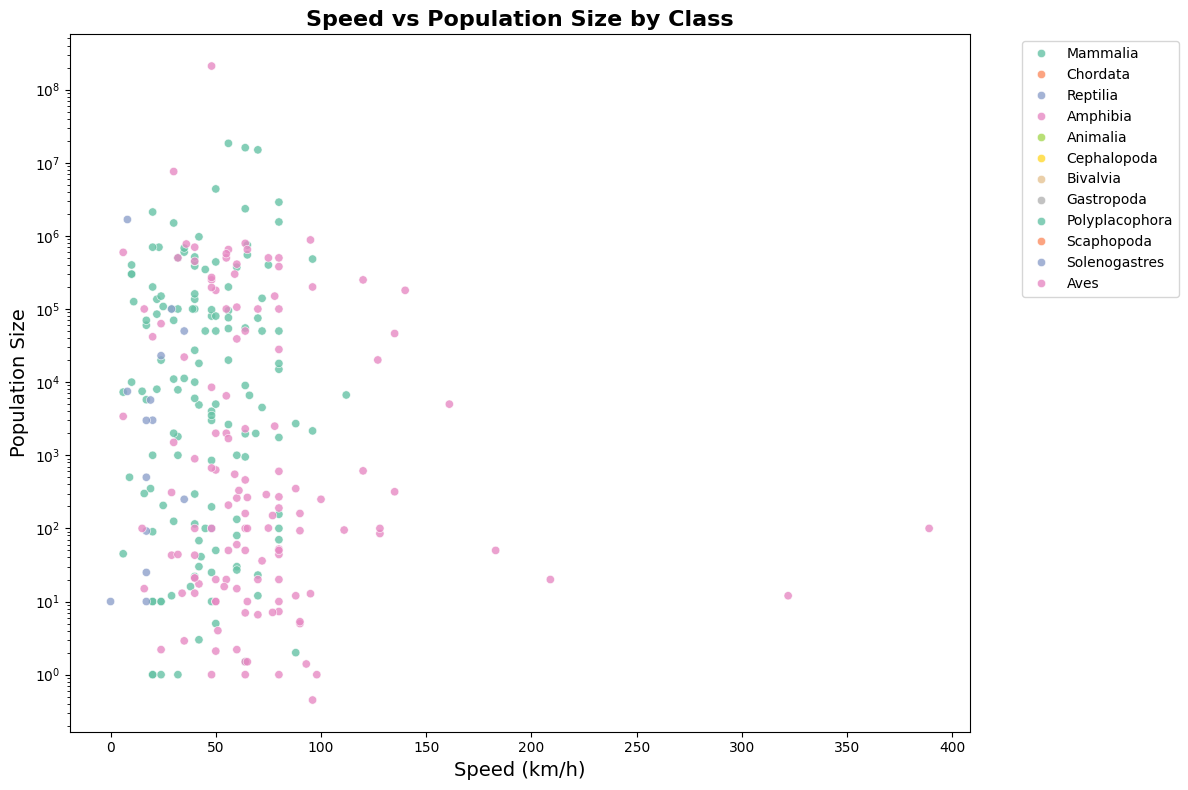

In [69]:
# Create a scatter plot of speed vs population size with an improved color palette
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Speed_kmh', y='Population_size_clean', 
                hue='Class', alpha=0.8, palette='Set2')  # Set2 for better contrast

# Add title and labels
plt.title('Speed vs Population Size by Class', fontsize=16, fontweight='bold')
plt.xlabel('Speed (km/h)', fontsize=14)
plt.ylabel('Population Size', fontsize=14)

# Set logarithmic scale for the y-axis
plt.yscale('log')

# Customize legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Tight layout to ensure everything fits well
plt.tight_layout()

plt.show()

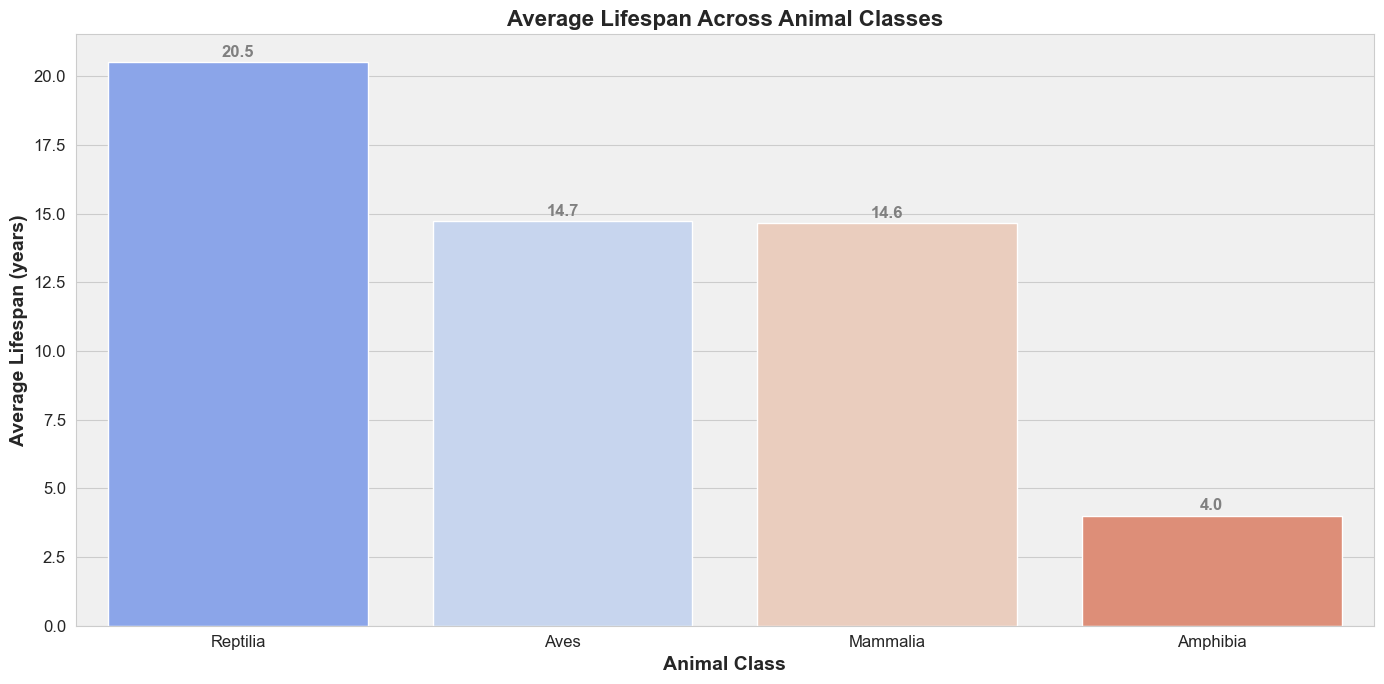

In [80]:
# Set figure size and style
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16

# Calculate average lifespan and remove NaN values
avg_lifespan = df.groupby('Class')['Life_span_years'].mean().dropna().sort_values(ascending=False)

# Create a new color palette (using "coolwarm" for better contrast)
colors = sns.color_palette("coolwarm", n_colors=len(avg_lifespan))

# Plot with seaborn (set hue to 'Class' and disable the legend)
ax = sns.barplot(x=avg_lifespan.index, y=avg_lifespan.values, palette=colors, hue=avg_lifespan.index, legend=False)

# Add value labels on top of the bars with grey color
for i, v in enumerate(avg_lifespan.values):
    ax.text(i, v + 0.1, f'{v:.1f}', ha='center', va='bottom', fontweight='bold', color='grey')

# Title and labels
plt.title('Average Lifespan Across Animal Classes', fontweight='bold')
plt.xlabel('Animal Class', fontweight='bold')
plt.ylabel('Average Lifespan (years)', fontweight='bold')

# Add a subtle background color
plt.gca().set_facecolor('#f0f0f0')

# Adjust layout and add tight border
plt.tight_layout()
plt.show()


In [81]:
# Average lifespan by class
avg_lifespan = df.groupby('Class')['Life_span_years'].mean().sort_values(ascending=False)
print("\nAverage Lifespan by Class:")
print(avg_lifespan)


Average Lifespan by Class:
Class
Reptilia          20.507042
Aves              14.719048
Mammalia          14.645336
Amphibia           4.000000
Animalia                NaN
Bivalvia                NaN
Cephalopoda             NaN
Chordata                NaN
Gastropoda              NaN
Polyplacophora          NaN
Scaphopoda              NaN
Solenogastres           NaN
Name: Life_span_years, dtype: float64
